In [1]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor

import numpy as np
import scipy as sp
from scipy import stats


import pandas as pd
import random
import math
from matplotlib.ticker import ScalarFormatter

# ACQUISIZIONE DATI

In [2]:
from astropy.io import fits
# import pyfits

## Sito di GitHub per un po' del codice ----> http://eso-python.github.io/ESOPythonTutorials/FITS-images.html

In [3]:
hdu_list = fits.open('t10k/bias/bias1_10k.fit')
hdu_list.info()

Filename: t10k/bias/bias1_10k.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (1024, 1536)   int16 (rescales to uint16)   


In [4]:
image_data = hdu_list[0].data
#print(type(image_data))
print(image_data.shape)

(1536, 1024)


In [5]:
header = hdu_list['PRIMARY'].header
#header

In [6]:
## USARE QUESTO SE NON SI VUOLE ANALIZZARE L'HEADER
#image_data = fits.getdata(image_file)
#print(type(image_data))
#print(image_data.shape)

## USARE QUESTO SOLO PER L'HEADER
#header = fits.getheader(image_file)

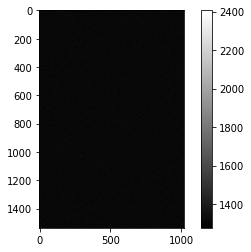

In [7]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [8]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 1277
Max: 2407
Mean: 1313.6765232086182
Stdev: 6.541325045241924


In [9]:
# RENDERE L'ARRAY UNIDIMENSIONALE (??)
print(type(image_data.flat))

<class 'numpy.flatiter'>


(1200, 1400)

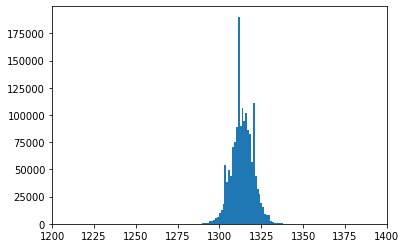

In [10]:
NBINS = 1000
histogram = plt.hist(image_data.flat, NBINS)
plt.xlim(1200,1400)

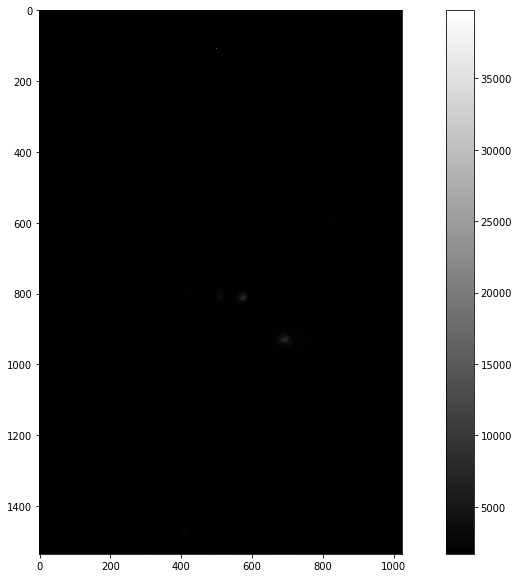

In [11]:
hdu_list = fits.open('M42_b30s.fit')
image_data = hdu_list[0].data

fig, ax = plt.subplots(figsize=(16, 10))

im = ax.imshow(image_data, cmap='gray')
fig.colorbar(im)

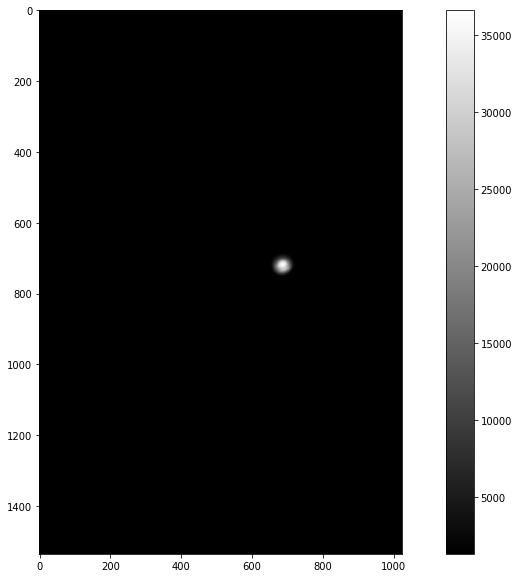

In [12]:
hdu_list = fits.open('Giove e Lune/giove_b0.2s.fit')
image_data = hdu_list[0].data

fig, ax = plt.subplots(figsize=(16, 10))

im = ax.imshow(image_data, cmap='gray')
fig.colorbar(im)

# RIMOZIONE DEL BIAS

Filename: BIASMED 10k.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1024, 1536)   float32   
(1536, 1024)
mu = 1312.9791259765625, sigma = 0.20743733644485474, N = 1536


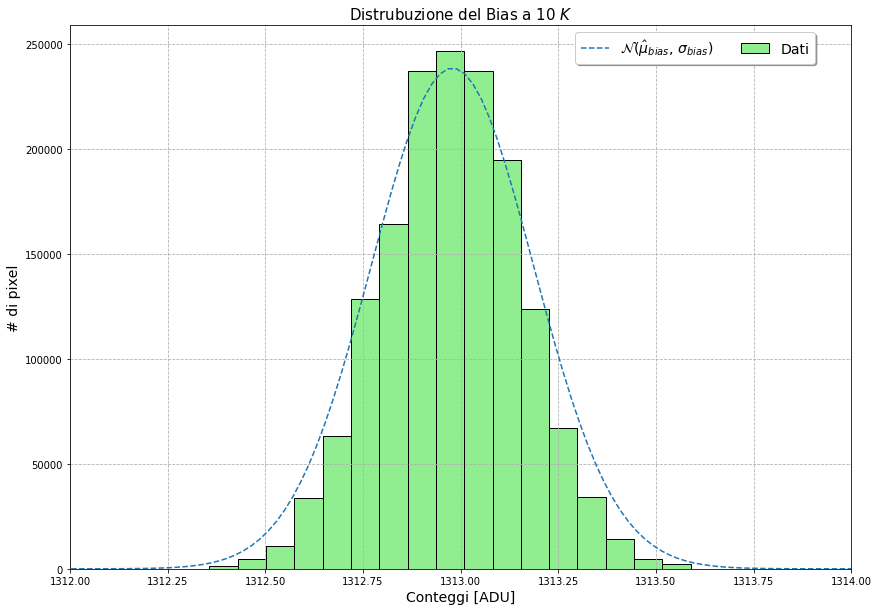

In [50]:
##PROVA METODO LABMECC


hdu_list = fits.open('BIASMED 10k.fit')
hdu_list.info()


image_data = hdu_list[0].data
#print(type(image_data))
print(image_data.shape)
# calcolo media, deviazione standard, e numero di eventi
mu = np.mean(image_data)
sigma = np.std(image_data)
n = len(image_data)
print('mu = {0}, sigma = {1}, N = {2}'.format(mu, sigma, n))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

# larghezza del bin
binw = 0.0725

# corretta normalizzazione  della gaussiana
norm = n*binw

# uso la pdf gaussiana di scipy (sp)
f_gauss = 1113.6*norm*stats.norm.pdf(x, mu, sigma)

# istogramma con un vettore di bin definito

fig, ax = plt.subplots(figsize=(14, 10))


histogram = ax.hist(image_data.flat,bins=np.arange(mu - 3*sigma, mu + 3*sigma, binw), edgecolor='black', color='lightgreen',label='Dati')
ax.plot(x, f_gauss,linestyle='--', label='$\mathcal{N}(\hat\mu_{bias},\,\sigma_{bias})\,$')
ax.set_title('Distrubuzione del Bias a 10 $K$', fontsize=15)
ax.set_xlim(1312,1314)
ax.grid(ls='--')
ax.set_xlabel('Conteggi [ADU]', fontsize=14)
ax.set_ylabel('Numero di pixel', fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=14, facecolor='white')


Filename: BIASMED -10k.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1024, 1536)   float32   
(1536, 1024)
mu = 1338.4688720703125, sigma = 0.010953286662697792, N = 1536


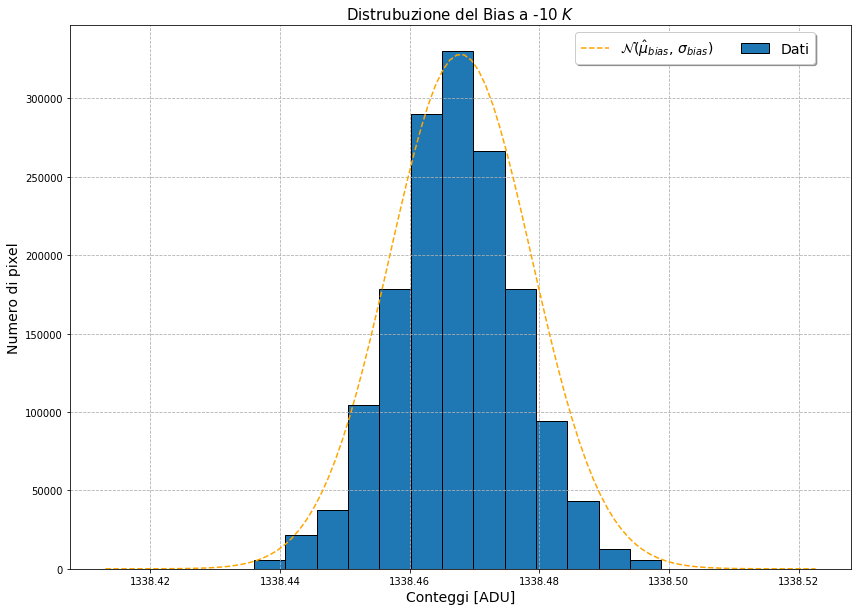

In [55]:
##PROVA METODO LABMECC
hdu_list = fits.open('BIASMED -10k.fit')
hdu_list.info()

image_data = hdu_list[0].data
#print(type(image_data))
print(image_data.shape)

mu = np.mean(image_data)
sigma = np.std(image_data)


# calcolo media, deviazione standard, e numero di eventi
mu = np.mean(image_data)
sigma = np.std(image_data)
n = len(image_data)
print('mu = {0}, sigma = {1}, N = {2}'.format(mu, sigma, n))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

# larghezza del bin
binw = 0.00725/1.5
# corretta normalizzazione  della gaussiana
norm = n*binw

# uso la pdf gaussiana di scipy (sp)
f_gauss = 1213.6*norm*stats.norm.pdf(x, mu, sigma)

# istogramma con un vettore di bin definito
fig, ax = plt.subplots(figsize=(14, 10))


histogram = ax.hist(image_data.flat,bins=np.arange(mu - 3*sigma, mu + 3*sigma, binw), edgecolor='black',label='Dati')
ax.plot(x-0.001, f_gauss, color='orange',linestyle='--', label='$\mathcal{N}(\hat\mu_{bias},\,\sigma_{bias})\,$')
ax.set_title('Distrubuzione del Bias a -10 $K$ ', fontsize=15)
#ax.set_xlim(1312,1314)
ax.grid(ls='--')
ax.set_xlabel('Conteggi [ADU]', fontsize=14)
ax.set_ylabel('Numero di pixel', fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=14, facecolor='white')

ax.get_xaxis().get_major_formatter().set_useOffset(False)

Filename: BIASMED -30k.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1024, 1536)   float32   
(1536, 1024)
mu = 1357.5001220703125, sigma = 0.0025003987830132246, N = 1536


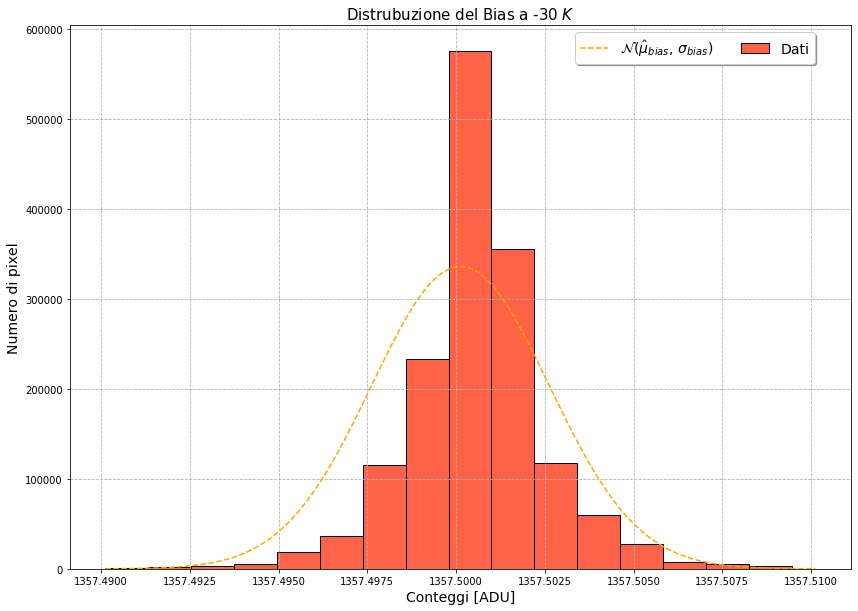

In [64]:
##PROVA METODO LABMECC
hdu_list = fits.open('BIASMED -30k.fit')
hdu_list.info()
image_data = hdu_list[0].data
#print(type(image_data))
print(image_data.shape)


# calcolo media, deviazione standard, e numero di eventi
mu = np.mean(image_data)
sigma = np.std(image_data)
n = len(image_data)
print('mu = {0}, sigma = {1}, N = {2}'.format(mu, sigma, n))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# larghezza del bin
binw = 0.00725/6

# corretta normalizzazione  della gaussiana
norm = n*binw

# uso la pdf gaussiana di scipy (sp)
f_gauss = 1136*norm*stats.norm.pdf(x, mu, sigma)

# istogramma con un vettore di bin definito
fig, ax = plt.subplots(figsize=(14, 10))


histogram = ax.hist(image_data.flat,bins=np.arange(mu - 4*sigma, mu + 4*sigma, binw), edgecolor='black', color='tomato',label='Dati')
ax.plot(x, f_gauss, color='orange',linestyle='--', label='$\mathcal{N}(\hat\mu_{bias},\,\sigma_{bias})\,$')
ax.set_title('Distrubuzione del Bias a -30 $K$', fontsize=15)
#ax.set_xlim(1312,1314)
ax.grid(ls='--')
ax.set_xlabel('Conteggi [ADU]', fontsize=14)
ax.set_ylabel('Numero di pixel', fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 1.0), fancybox=True, shadow=True, ncol=2, fontsize=14, facecolor='white')

ax.get_xaxis().get_major_formatter().set_useOffset(False)

Filename: BIASMED -30k.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   (1024, 1536)   float32   
(1536, 1024)
mu = 1357.5001220703125, sigma = 0.0025003987830132246, N = 1536


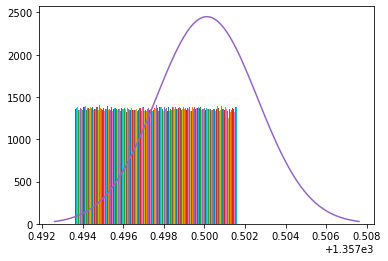

In [23]:
##PROVA METODO LABMECC
hdu_list = fits.open('BIASMED -30k.fit')
hdu_list.info()
image_data = hdu_list[0].data
#print(type(image_data))
print(image_data.shape)

# calcolo media, deviazione standard, e numero di eventi
mu = image_data.mean()
sigma = image_data.std()
n = len(image_data)
print('mu = {0}, sigma = {1}, N = {2}'.format(mu, sigma, n))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# larghezza del bin
binw = 0.01

# corretta normalizzazione  della gaussiana
norm = n*binw

# uso la pdf gaussiana di scipy (sp)
f_gauss = norm*stats.norm.pdf(x, mu, sigma)

# istogramma con un vettore di bin definito
plt.hist(image_data,bins=np.arange(mu - 3*sigma, mu + 3*sigma, binw))
plt.plot(x, f_gauss)

In [17]:
# AUMENTARE BIN FINIRE GRAFICI ULTIMO GRAFICO NA CHIAVICA
## ----- > CONTROLLARE COSA CI STA SULLE X E SULLE Y DEI GRAFICI DI BIAS
## FARE CALIBRAZIONE FOTOMETRICA M42

# CALIBRAZIONE FOTOMETRICA

In [18]:
## USO tet02 Ori A Per calibrare fotometricamente M42  ORDINE B,V,R,IR

m=np.asarray([6.30,6.39,6.30,6.35])
msigma=0.1

F=np.asarray([(277.113/30),(1234.99/60),(1564.710/30),(799.622/30)])  ##Magnitudini segnate dal programma ([7.586,6.716,5.707,6.436])
Fsigma=np.asarray([0.215,0.567,1.287,0.617])

#/---------RICAVO C----------/

C=m+2.5*np.log10(F)
print(C)


#/-------Osservazioni altre stelle--------/


ForiB=np.asarray([(80.186/30),(304.155/60),(472.771/30),(207.058/30)]) ##Magnitudini segnate dal programma ([8.933,8.238,7.006,7.903])
ForiBsigma=np.asarray([0.067,0.165,0.375,0.178])
moriB=-2.5*np.log10(ForiB)+C
print(moriB)


ForiC=np.asarray([(/30),(/60),(/30),(/30)]) ##Magnitudini segnate dal programma ([])
ForiCsigma=np.asarray([])
moriC=-2.5*np.log10(ForiC)+C
print(moriC)


Fhd=np.asarray([(/30),(/60),(/30),(/30)]) ##Magnitudini segnate dal programma ([])
Fhdsigma=np.asarray([])
mhd=-2.5*np.log10(Fhd)+C
print(mhd)


SyntaxError: invalid syntax (<ipython-input-18-e41939a04aaa>, line 24)